# Data Exploration

In [1]:
import pandas as pd
import torch


data = pd.read_csv('./data/data.txt', header=None, delim_whitespace=True)
features = pd.read_csv('./data/Features.txt', header=None)
columns = features.values.squeeze()
dictionary_columns = {x.split(' - ')[0]: x for x in columns}

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
data[11].describe()

count    1.193400e+04
mean     9.980000e-01
std      2.533635e-13
min      9.980000e-01
25%      9.980000e-01
50%      9.980000e-01
75%      9.980000e-01
max      9.980000e-01
Name: 11, dtype: float64

In [11]:
cormat = data.iloc[:,:-2].corr()

round(cormat,2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.00,1.00,0.96,0.96,0.99,0.96,0.96,0.96,NaN,0.98,0.96,NaN,0.97,0.95,0.91,0.93
1,1.00,1.00,0.96,0.96,0.99,0.96,0.96,0.96,NaN,0.98,0.96,NaN,0.97,0.95,0.91,0.93
2,0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,NaN,0.99,1.00,NaN,1.00,1.00,0.98,1.00
3,0.96,0.96,0.99,1.00,0.94,0.99,0.99,0.98,NaN,0.99,1.00,NaN,1.00,0.99,0.96,0.98
4,0.99,0.99,0.93,0.94,1.00,0.93,0.93,0.94,NaN,0.97,0.94,NaN,0.95,0.92,0.88,0.90
5,0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,NaN,0.99,1.00,NaN,1.00,1.00,0.98,0.99
6,0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,NaN,0.99,1.00,NaN,1.00,1.00,0.98,0.99
7,0.96,0.96,0.99,0.98,0.94,0.99,0.99,1.00,NaN,0.99,0.99,NaN,0.99,0.98,0.97,0.99
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.98,0.98,0.99,0.99,0.97,0.99,0.99,0.99,NaN,1.00,0.99,NaN,0.99,0.98,0.96,0.98


<Axes: >

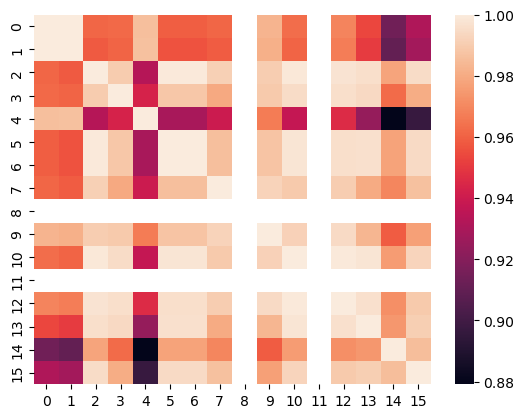

In [12]:
import seaborn as sns

sns.heatmap(cormat)

# Model Creation

In [10]:
from torch.utils.data.dataset import Dataset

class CustomDatasetFromCSV(Dataset):
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path, header=None, delim_whitespace=True)
        x = self.data.iloc[:,:-2].values
        y = self.data.iloc[:,-1].values

        x = torch.tensor(x, dtype =torch.float32)
        self.x_train = torch.nn.functional.normalize(x, p=1.0, dim=1, eps=1e-12, out=None)

        self.y_train = torch.tensor(y, dtype =torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.x_train)
    
    def __getitem__ (self,idx):
        return self.x_train[idx], self.y_train[idx]


In [20]:
aaa= CustomDatasetFromCSV('./data/data.txt')

In [12]:
from torch.utils.data import DataLoader

train_size = int(0.8 * len(aaa))
test_size = len(aaa) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(aaa, [train_size, test_size])


train_dataloader = DataLoader(train_dataset, batch_size=8)
test_dataloader = DataLoader(test_dataset, batch_size=8)

In [13]:
# for b in range(16):
#     print(b)
#     print(X[:,b].min(),X[:,b].max())

In [14]:
# bbb = torch.nn.functional.normalize(X, p=1.0, dim=1, eps=1e-12, out=None)

In [15]:
# for b in range(16):
#     print(b)
#     print(bbb[:,b].min(),bbb[:,b].max())

In [16]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
model = linearRegression(16, 1)

In [ ]:
from torch.utils.data import DataLoader
from torch import nn


def train(dataloader, model, loss_fn, optimizer):
    """A function to train a model for one epoch."""
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # print(y.shape)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    """A function to test a model on the validation / test dataset."""
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

    return test_loss


lr = 1e-3
epochs = 5

device = "cuda" if torch.cuda.is_available() else "cpu"


model = model.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
test_acc = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test_acc = test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
with torch.no_grad():
    for id in range(len(test_dataset)):
        X, y = test_dataset[id]
        X, y = X.to(device), y.to(device)
        pred = model(X)
        p = pred.item()
        gt = y.item()
        print(f'prediction: {p:.3f}, gt: {gt:.3f}, difference: {p - gt:.3f}')